## Data Visualizations for Messy Data

#### Learn how to work around problems with visualizing messy and missing data.

Data visualization tutorials generally use pre-processed data. But what about datasets in the wild? What do we do about missing data? Or outliers that largely skew visualizations? What do we do when there are too many observations to be interpretable in a scatterplot? This article will introduce some of the methods we can use to work around these problems.

Let’s say we are new real estate agents who want to use data to better understand the relationship between the price and the number of bedrooms in a home. We will be using a dataset we have called housing from [Kaggle](https://www.kaggle.com/austinreese/usa-housing-listings) on USA Housing Listings.

### Missing data

Incomplete observations — or missing data — are generally ignored by plotting functions in commonly-used Python libraries, such as matplotlib and seaborn. Therefore, we may want to remove those rows or impute the missing values before plotting. We can check for missing data using <span style="color:aqua">**info()**</span>:

In [2]:
import pandas as pd

housing = pd.read_csv('/home/oldoc/largeDataSets/housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

Based on this output, we may be concerned about the columns laundry_options and parking_options because they have more missing values than other columns.

In [3]:
housing[['laundry_options','parking_options']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   laundry_options  305951 non-null  object
 1   parking_options  244290 non-null  object
dtypes: object(2)
memory usage: 5.9+ MB


### Preliminary view

Let’s take a first look at two variables and see what issues we run into. Here is a plot of price vs. area in square feet:

<AxesSubplot: xlabel='sqfeet', ylabel='price'>

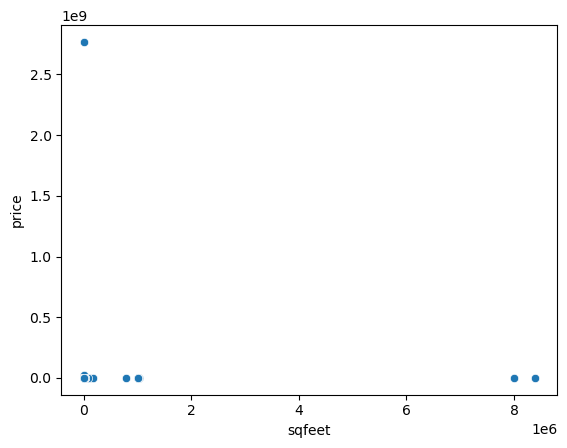

In [4]:
import seaborn as sns

sns.scatterplot(data=housing, x=housing['sqfeet'], y=housing['price'])

It doesn’t look like there are many points on this plot, even though there should be over 300,000 points. The 1e6 and 1e9 on the x- and y- axes, respectively, indicate that the scale and range for both features is incredibly large. For example, we have at least one housing listing that costs almost 3,000,000,000 dollars per month. Dealing with these outliers is the first thing we will have to do in order to more effectively visualize the data.

### Plotting with outliers

We can whittle down each feature in the plot to cut out outliers until we have a better feel for the data. It can take some trial and error to find the right values, so let’s start by limiting price to less than $10,000,000 and sqfeet to less than 2,000,000:

<AxesSubplot: xlabel='sqfeet', ylabel='price'>

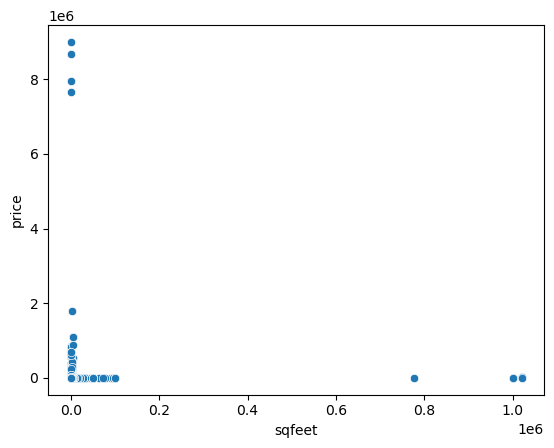

In [5]:
housing2 = housing[(housing.price < 10000000) & (housing.price>0)]
housing2 = housing2[(housing2.sqfeet < 2000000) & (housing2.sqfeet>0)]
sns.scatterplot(data=housing2, x=housing2['sqfeet'], y=housing2['price'])

This scatterplot is a little bit better. We can see more points showing in the bottom left-hand side of the plot. Let’s get closer to that cluster of points: let’s limit both price and sqfeet to values less than 20,000:

<AxesSubplot: xlabel='sqfeet', ylabel='price'>

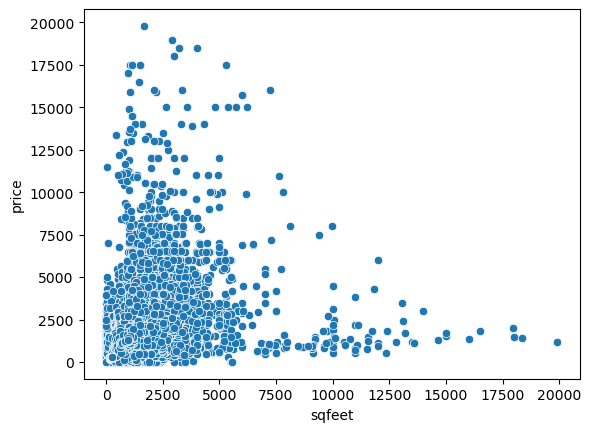

In [6]:
housing2 = housing[(housing.price < 20000) & (housing.price>0)]
housing2 = housing2[(housing2.sqfeet < 20000) & (housing2.sqfeet>0)]
sns.scatterplot(data=housing2, x=housing2['sqfeet'], y=housing2['price'])

Now we are starting to see all of the points! There is still a lot of white space on the right-hand side, so let’s limit our data one more time, this time limiting both price and sqfeet to values less than 3,000:

<AxesSubplot: xlabel='sqfeet', ylabel='price'>

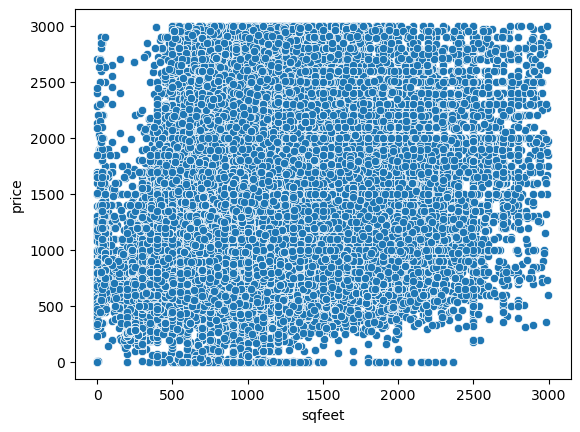

In [7]:
## limit price and sqfeet to < 3000
housing2 = housing[(housing.price < 3000) & (housing.price>0)]
housing2 = housing2[(housing2.sqfeet < 3000) & (housing2.sqfeet>0)]
sns.scatterplot(data=housing2, x=housing2['sqfeet'], y=housing2['price'])

Now we can really see the bulk of the points from our dataset. However there are still so many points here that they are all printed on top of one another. This means that we cannot visualize the density of the points and therefore the overall relationship between price and area.

<AxesSubplot: xlabel='sqfeet', ylabel='price'>

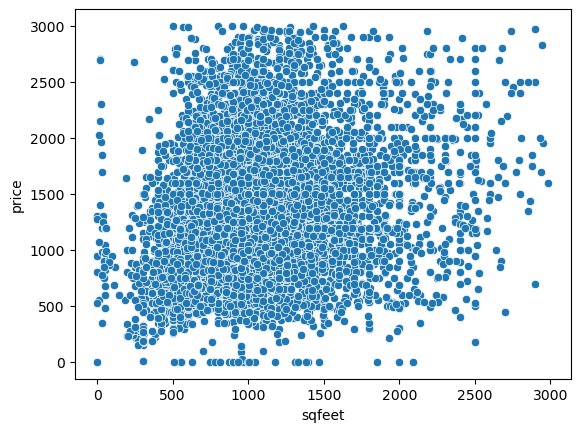

In [8]:
perc = 0.05
housing_sub = housing2.sample(n = int(housing2.shape[0]*perc))
sns.scatterplot(data=housing_sub, x=housing_sub['sqfeet'], y=housing_sub['price'])


There’s still a lot of overlap, but we can actually see the positive linear association between area and price that was difficult to visualize originally.

We can still improve upon this. We can try making each point smaller to better see places of higher concentration of plotted points:

<AxesSubplot: xlabel='sqfeet', ylabel='price'>

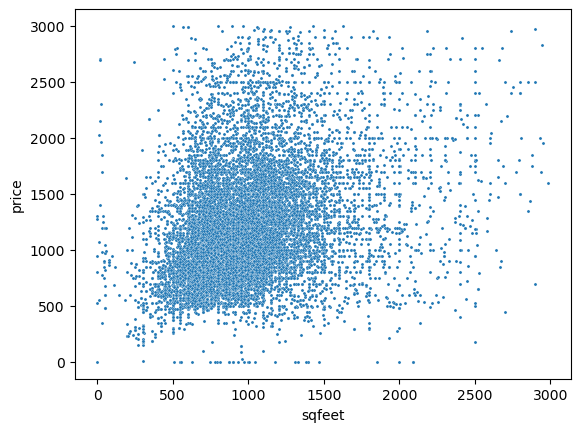

In [9]:
sns.scatterplot(data=housing_sub, x=housing_sub['sqfeet'], y=housing_sub['price'], s=5)


This plot is better than the previous one because, at a glance, we can see the higher concentration of points in the 500 to 1500 sqfeet range and the 500 to 2000 price range. However this still doesn’t give us a great understanding of just how many points are in this middle cluster. Rather than plotting the points smaller, we may want to make them more see-through. This way, we can interpret color intensity to understand the overlap:

<AxesSubplot: xlabel='sqfeet', ylabel='price'>

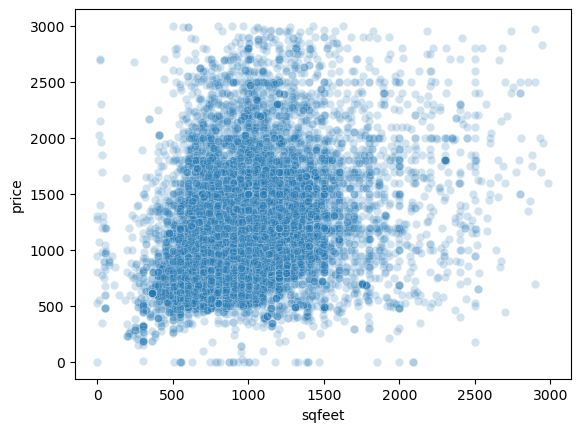

In [10]:
sns.scatterplot(data=housing_sub, x=housing_sub['sqfeet'], y=housing_sub['price'], alpha=0.2)


We can see that the bottom section of the plot is darker than the top section. This is due to many more points overlapping each other at the lower price levels and fewer points overall as price increases. 

We also might consider plotting a LOWESS (Locally Weighted Scatterplot Smoothing) smoother over our data points. This will draw a line through the approximate average price for each value of sqfeet:

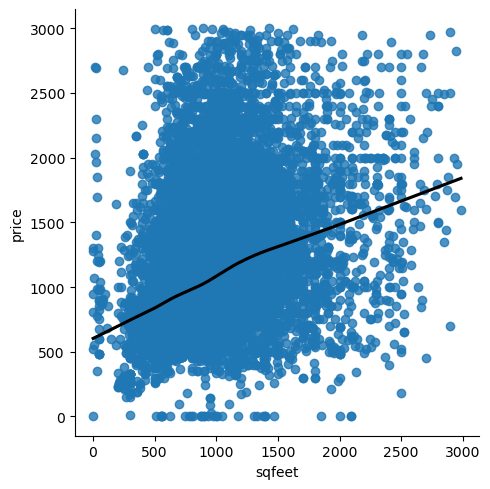

In [11]:
sns.lmplot(x='sqfeet', y='price', data = housing_sub, line_kws={'color': 'black'}, lowess=True)

Though the individual points are more difficult to read, the line gives us information about the relationship between these two features.

### Visualizing discrete variables

Let’s say we wanted to look at the relationship between beds and baths in our data set. We can easily plot the scatterplot:

<AxesSubplot: xlabel='beds', ylabel='baths'>

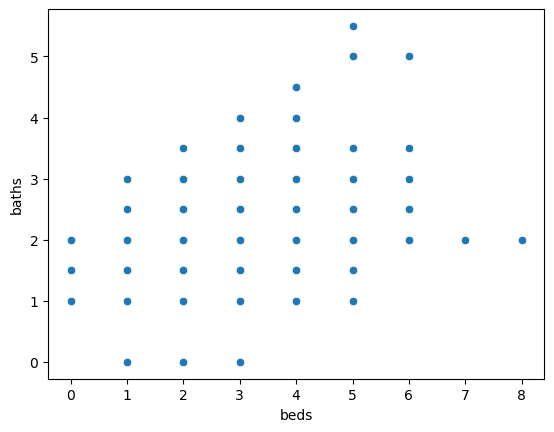

In [12]:
sns.scatterplot(x='beds', y='baths', data = housing_sub)

While this plot tells us each combination of number of beds and bathrooms in our data set, it doesn’t tell us how many observations there are. This is because both features are discrete values, in this case meaning limited to whole numbers for beds and half numbers for bath. So every data point that represents 3 beds and 2 bathrooms is plotted at the exact same spot as the others, perfectly overlapping to look like one point.

Adding a jitter adjusts the spread of points along either (or both) axes in order to more easily see some many points there are in each group:

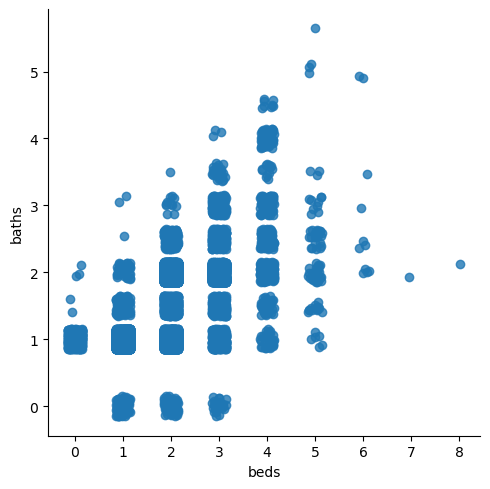

In [13]:
sns.lmplot(x='beds', y='baths', data = housing_sub, x_jitter = .15, y_jitter = .15, fit_reg = False)

We can look at this plot and learn a lot more than the previous one. For example, we know that there are fewer points at every bath level when beds is equal to 6 compared to 5. 

### Log transformation

Sometimes when data are on a log scale, it can be hard to visualize the distribution of the values. Features with positive values that are highly right-skewed are prime candidates for log transformation. Let’s look at the distribution of price from our dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

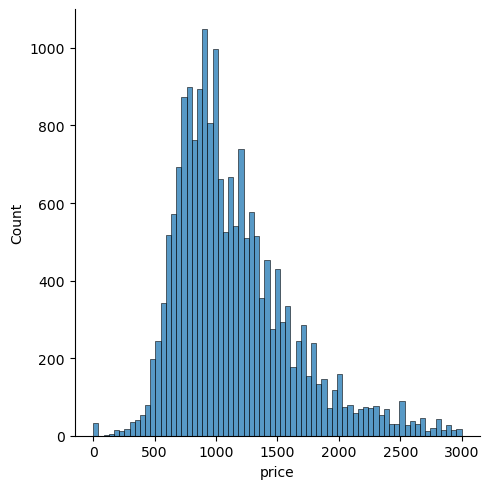

In [14]:
housing.info()
sns.displot(data=housing_sub, x='price')


Here we can see one tall peak on the left-hand side, and a very long right-tail along the x-axis. While we could try to trim down the price values like before, it might be beneficial to try plotting the distribution of log price instead:

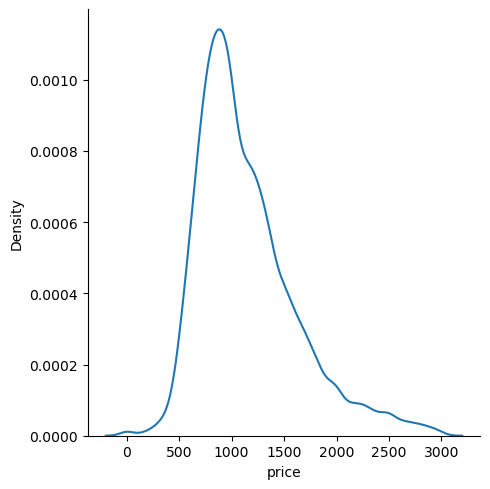

In [15]:
sns.displot(data=housing_sub, x='price', kind="kde")

In [22]:
import numpy as np
import matplotlib.pyplot as plt

log_price = housing_sub.price[housing_sub.price>0]
log_price = np.log(log_price)

This histogram provides a lot more information than the data in the original form. We can even limit the plot to just be between 5 and 10 to see the distribution more clearly:

(5.0, 10.0)

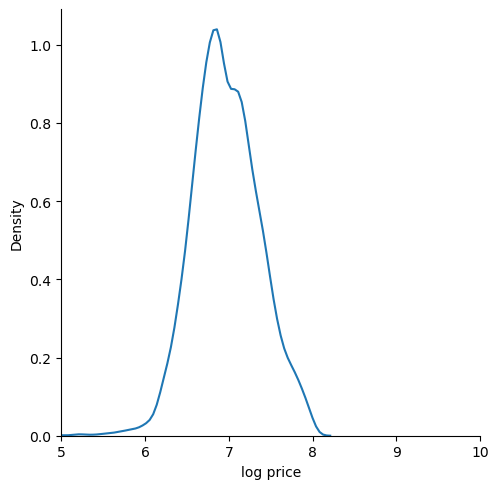

In [23]:
sns.displot(data=housing_sub, x=log_price, kind='kde')
plt.xlabel('log price')
plt.xlim(5,10)

This plot indicates that log price is unimodal and approximately normally distributed. This is helpful knowledge if we want to build a model to predict prices in the future.

### Conclusion

Making interpretable data visualizations is not always as easy as just plotting all of the data. Oftentimes, visualizations require some additional steps, such as jittering, making points smaller or more opaque, or transforming the data. Following these steps will help you to make more dynamic and interpretable visualizations in the future.